In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import tensorflow

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import jieba

In [0]:
!pip install -qq pkuseg

     |████████████████████████████████| 50.2MB 62kB/s 


In [0]:
import pkuseg

In [0]:
from google.colab import drive

In [8]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_path = '/content/drive/My Drive/NLP/搜索引擎公司用户画像'

In [0]:
def log(stri):
    now = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
    print(str(now) + ' ' + str(stri))

# Preprocessing Data (Done in local, SKIP)

In [0]:
train = pd.read_csv(data_path + '/data/train.csv', sep='###__###', header=None)
# test = pd.read_csv(data_path + '/data/test.csv', sep='###__###', header=None)

In [0]:
train.head()

,0,1,2,3,4
0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...
1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只..."
2,E97654BFF5570E2CCD433EA6128EAC19,4,1,0,钻石之泪耳机\t盘锦到沈阳\t旅顺公交\t辽宁阜新车牌\tbaidu\tk715\tk716...
3,6931EFC26D229CCFCEA125D3F3C21E57,4,2,3,最受欢迎狗狗排行榜\t舶怎么读\t场景描 写范例\t三维绘图软件\t枣和酸奶能一起吃吗\t好...
4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...


In [0]:
train.columns = ['ID', 'Age', 'Gender', 'Education', 'Query_List']

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          100000 non-null  object
 1   Age         100000 non-null  int64 
 2   Gender      100000 non-null  int64 
 3   Education   100000 non-null  int64 
 4   Query_List  100000 non-null  object
dtypes: int64(3), object(2)
memory usage: 3.8+ MB


In [0]:
train['Age'] = train['Age'].astype(str)
train['Gender'] = train['Gender'].astype(str)
train['Education'] = train['Education'].astype(str)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          100000 non-null  object
 1   Age         100000 non-null  object
 2   Gender      100000 non-null  object
 3   Education   100000 non-null  object
 4   Query_List  100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


## 数据介绍

本数据来源于真实搜索引擎数据，ID经过加密，训练集中人口属性数据存在部分未知的情况。数据所有字段如下表所示：

| 字段       | 说明                                                         |
| ---------- | ------------------------------------------------------------ |
| ID         | 加密后的ID                                                   |
| Age        | 0：未知年龄; 1：0-18岁; 2：19-23岁; 3：24-30岁; 4：31-40岁; 5：41-50岁; 6： 51-999岁 |
| Gender     | 0：未知1：男性2：女性                                        |
| Education  | 0：未知学历; 1：博士; 2：硕士; 3：大学生; 4：高中; 5：初中; 6：小学 |
| Query List | 搜索词列表                                                   |



In [0]:
train.head()

,ID,Age,Gender,Education,Query_List
0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...
1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只..."
2,E97654BFF5570E2CCD433EA6128EAC19,4,1,0,钻石之泪耳机\t盘锦到沈阳\t旅顺公交\t辽宁阜新车牌\tbaidu\tk715\tk716...
3,6931EFC26D229CCFCEA125D3F3C21E57,4,2,3,最受欢迎狗狗排行榜\t舶怎么读\t场景描 写范例\t三维绘图软件\t枣和酸奶能一起吃吗\t好...
4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...


## 只保留年龄、性别、学历都有的数据

In [0]:
train[train['Age']!='0'].shape, train[train['Education']!='0'].shape, train[train['Gender']!='0'].shape

((98334, 5), (90720, 5), (97845, 5))

In [0]:
train_not_null = train[train['Age']!='0'][train['Education']!='0'][train['Gender']!='0']

In [0]:
train_not_null.shape

(88492, 5)

In [0]:
train_not_null.head()

,ID,Age,Gender,Education,Query_List
0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...
1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只..."
3,6931EFC26D229CCFCEA125D3F3C21E57,4,2,3,最受欢迎狗狗排行榜\t舶怎么读\t场景描 写范例\t三维绘图软件\t枣和酸奶能一起吃吗\t好...
4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...
6,0D58894CD481D4B3039000661665C0DB,3,2,3,貔貅饲育指南\t韩姨\t贵阳学古琴\t洛基\t风速狗\t综英美]店主不好吃\t>重生之被拐儿...


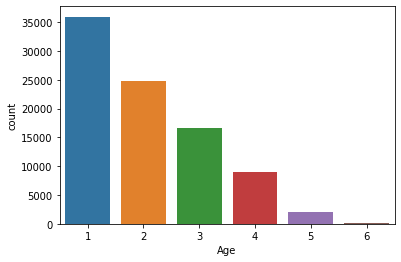

In [0]:
sns.countplot(train_not_null['Age'])

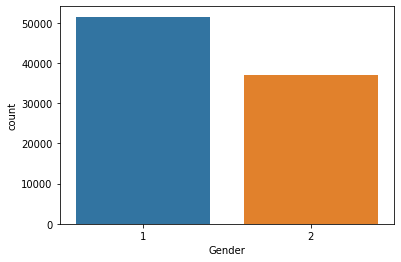

In [0]:
sns.countplot(train_not_null['Gender'])

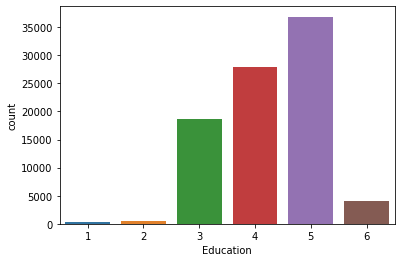

In [0]:
sns.countplot(train_not_null['Education'])

In [0]:
train_not_null['Education'].value_counts()

5    36852
4    27956
3    18708
6     4066
2      556
1      354
Name: Education, dtype: int64

In [0]:
train_not_null['Age'].value_counts()

1    35965
2    24785
3    16561
4     8967
5     2039
6      175
Name: Age, dtype: int64

In [0]:
def count_query(query):
    q = query.replace('?', '\t').replace('？', '\t').split('\t')
    return len(q)

In [0]:
train_not_null['query_count'] = train_not_null['Query_List'].apply(count_query)

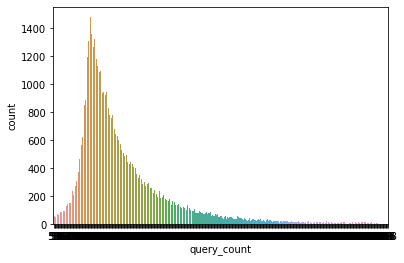

In [0]:
sns.countplot(train_not_null['query_count'])

(array([13275., 43189., 16460.,  7291.,  3505.,  1922.,  1132.,   730.,
          594.,   394.]),
 array([ 50. ,  94.8, 139.6, 184.4, 229.2, 274. , 318.8, 363.6, 408.4,
        453.2, 498. ]),
 <a list of 10 Patch objects>)

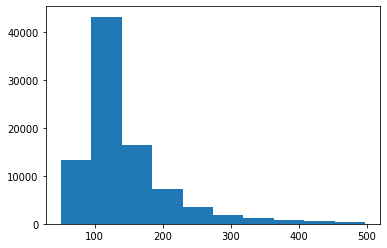

In [0]:
plt.hist(train_not_null.query_count)

In [0]:
train_not_null.query_count.mean()

142.93597161325317

In [0]:
train_not_null.query_count.describe()

count    88492.000000
mean       142.935972
std         66.466200
min         50.000000
25%        101.000000
50%        122.000000
75%        162.000000
max        498.000000
Name: query_count, dtype: float64

# 分词器词性标注功能对比
- pkuseg: 词性标注
- jieba: 词性标注
- jieba with paddle  （暂选 0405）

In [0]:
import jieba.posseg as pseg

In [0]:
pku = pkuseg.pkuseg(postag=True)

Downloading: "https://github.com/lancopku/pkuseg-python/releases/download/v0.0.16/postag.zip" to /root/.pkuseg/postag.zip
100%|██████████| 41424981/41424981 [00:05<00:00, 7874115.08it/s] 


In [0]:
pku.cut('川普刁难中国')

[('川普', 'nr'), ('刁难', 'v'), ('中国', 'ns')]

In [0]:
pku.cut('我听不懂你的川普')

[('我', 'r'),
 ('听', 'v'),
 ('不', 'd'),
 ('懂', 'v'),
 ('你', 'r'),
 ('的', 'u'),
 ('川普', 'nr')]

In [0]:
pku.cut('查理普斯新歌')

[('查理普斯', 'nr'), ('新', 'a'), ('歌', 'n')]

In [0]:
pku.cut('喜欢的人给我朋友圈点赞')

[('喜欢', 'v'),
 ('的', 'u'),
 ('人', 'n'),
 ('给', 'p'),
 ('我', 'r'),
 ('朋友圈', 'n'),
 ('点赞', 'v')]

In [0]:
jieba.enable_paddle()

Installing paddle-tiny, please wait a minute......
Paddle enabled successfully......


In [0]:
pseg.lcut('川普刁难中国')

[pair('川普', 'nr'), pair('刁难', 'a'), pair('中国', 'ns')]

In [0]:
pseg.lcut('我听不懂你的川普')

[pair('我', 'r'),
 pair('听不懂', 'v'),
 pair('你', 'r'),
 pair('的', 'uj'),
 pair('川', 'j'),
 pair('普', 'nr')]

In [0]:
pseg.lcut('查理普斯新歌')

[pair('查理', 'v'), pair('普斯新歌', 'nz')]

In [0]:
pseg.lcut('Charlie Puth新歌')

[pair('Charlie', 'eng'), pair(' ', 'x'), pair('Puth', 'eng'), pair('新歌', 'n')]

In [0]:
pseg.lcut('喜欢的人给我朋友圈点赞')

[pair('喜欢', 'v'),
 pair('的', 'uj'),
 pair('人', 'n'),
 pair('给', 'p'),
 pair('我', 'r'),
 pair('朋友', 'n'),
 pair('圈点', 'n'),
 pair('赞', 'v')]

In [0]:
pseg.lcut('川普刁难中国', use_paddle=True)

[pair('川普', 'nz'), pair('刁难', 'v'), pair('中国', 'LOC')]

In [0]:
pseg.lcut('我听不懂你的川普', use_paddle=True)

[pair('我', 'r'),
 pair('听', 'v'),
 pair('不懂', 'v'),
 pair('你', 'r'),
 pair('的', 'u'),
 pair('川普', 'nz')]

In [0]:
pseg.lcut('查理普斯新歌', use_paddle=True)

[pair('查理普斯', 'PER'), pair('新歌', 'n')]

In [0]:
pseg.lcut('Charlie Puth新歌', use_paddle=True)

[pair('Charlie Puth', 'nr'), pair('新歌', 'n')]

In [0]:
pseg.lcut('喜欢的人给我朋友圈点赞', use_paddle=True)

[pair('喜欢', 'v'),
 pair('的', 'u'),
 pair('人', 'n'),
 pair('给', 'p'),
 pair('我', 'r'),
 pair('朋友圈', 'n'),
 pair('点赞', 'v')]

# 分词 (Done local, SKIP)

In [0]:
def cut_words(X):
    result = []

    contents = X.replace('?', '\t').replace('？', '\t')
    contents = contents.split('\t')
    
    for content in contents:
        if 'http:' in content or 'https:' in content:
            continue

        content = pseg.lcut(content, use_paddle=True)

        remain = []
        for word, tag in content:
            if tag in ['n', 's', 't', 'nr', 'ns', 'nt', 'nw', 'nz', 'vn', 'an', 'PER', 'LOC', 'ORG', 'TIME']:
                remain.append(word)
        
        result.append(remain)
    
    return result

In [0]:
train_not_null.head()

,ID,Age,Gender,Education,Query_List,query_count
0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...,275
1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只...",187
3,6931EFC26D229CCFCEA125D3F3C21E57,4,2,3,最受欢迎狗狗排行榜\t舶怎么读\t场景描 写范例\t三维绘图软件\t枣和酸奶能一起吃吗\t好...,173
4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...,117
6,0D58894CD481D4B3039000661665C0DB,3,2,3,貔貅饲育指南\t韩姨\t贵阳学古琴\t洛基\t风速狗\t综英美]店主不好吃\t>重生之被拐儿...,107


In [0]:
train_not_null['Word Segments'] = train_not_null.Query_List.apply(cut_words)

## 年龄

In [0]:
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X, y_age, stratify=y_age, random_state=42)

In [0]:
len(X_train_age), len(X_test_age)

(66369, 22123)

## jieba with paddle

---

paddle模式词性和专名类别标签集合如下表，其中词性标签 24 个（小写字母），专名类别标签 4 个（大写字母）。

| 标签  | 含义  |标签 | 含义|标签|含义 |标签|含义         |
| -------------- | -------------- |-------------- |-------------- |-------------- |-------------- |-------------- |------------------------------------------------------------ 
|n	|普通名词|	f	|方位名词	|s	|处所名词|	t|	时间|
|nr	|人名	|ns	|地名	|nt	|机构名	|nw	|作品名|
|nz	|其他专名	|v	|普通动词|	vd	|动副词	|vn|	名动词|
|a	|形容词	|ad	|副形词	|an	|名形词	|d	|副词|
|m	|数量词	|q	|量词	|r	|代词	|p	|介词|
|c	|连词	|u	|助词	|xc	|其他虚词	|w|	标点符号|
|PER	|人名	|LOC	|地名	|ORG	|机构名|	TIME|	时间|

In [0]:
def cut_words(X, y, is_train=True):
    result = []
    max_len = 0

    for i in range(len(X)):
        contents = X[i]
        contents = contents.replace('?', '\t').replace('？', '\t')
        contents = contents.split('\t')
    
        tmp = []
        for content in contents:
            if 'http:' in content or 'https:' in content:
                continue

            if is_train:
                max_len = max(max_len, len(content))
            content = pseg.lcut(content, use_paddle=True)

            remain = []
            for word, tag in content:
                if tag in ['n', 's', 't', 'nr', 'ns', 'nt', 'nw', 'nz', 'vn', 'an', 'PER', 'LOC', 'ORG', 'TIME']:
                    remain.append(word)
        
            tmp.append(remain)
    
        for t in tmp:
            sentences.extend(t)
        tmp = [' '.join(t) for t in tmp]
    
        result.append((' '.join(tmp), y[i]))
    
    if is_train:
        return result, max_len
    return result

In [0]:
train_data, max_len = cut_words(X_train_age, y_train_age)

KeyboardInterrupt: ignored

In [0]:
test_data = cut_words(X_test_age, y_test_age, False)

In [0]:
len(train_data)

73750

In [0]:
train_data[0]

('烤箱 费电 会 有人 不 喜欢 玩微信 吗 mr . 累成 狗 低筋 面粉 做 蛋糕 用加 发酵粉 吗 烤箱 做 纸杯 蛋糕 的 方法 督促 的 意思 是 什么 当归 鸡汤 有何 功效 一个 男 的 说 过 做 朋友 为什么 还 老来 关心 我 前年 跟 去年 的 区别 活 出自 我 的 意思 中秋节 快乐 英文 怎么 说 有人 会忙 到 晚上 一点多 才 发微 信来 吗 评论 了 别人 的 状态 一 刷新 就 没 了 一个 人 如果 不 喜欢 你 会 把 他 常用 的 微信 告诉 你 越陷越深 越 迷惘 的 意思 杯子 蛋糕 开裂 的 原因 老师 送给 老师 的 祝福语 威士忌 蛋挞 烤 多长时间 越陷越深 越 迷茫 出口成章 什么 意思 送给 老师 的 祝福语 揭西 黄满 寨 瀑布群 怎么 删除 点赞 我 的 人 烤箱 烤红薯 烂 桃花 是 什么 意思 电烤箱 乔任 梁 我 的 心太乱 要 一些 空白 心痛 的 说 说 来 大姨妈 吃 奇异果 一个 男 乱发 表情 , 还 发爱 你 呦 的 表情 给 女孩子 京东 购物 要 身份证 号码 微波炉 跟 烤箱 的 区别 大 东山 迷惘 是 什么 意思 羊奶 和 葡萄 能 一起 吃 吗 处暑 过后 炖 当归 鸡汤 前年 是 什么 年 个性 签名 脸皮厚 单身 的 好处 喜欢 的 人来 点赞 教师节 祝福语 心宽体胖 的 意思 天蝎 男爱 一个 人 的 表现 聊天 老 发表 情 是不是 就是 不在乎 你 雨声 潺潺 像 住 在 溪边 暗恋 的 人来 朋友 圈点 赞',
 '2')

In [0]:
max_len

40

# 数据介绍

本数据来源于真实搜索引擎数据，ID经过加密，训练集中人口属性数据存在部分未知的情况。数据所有字段如下表所示：

| 字段       | 说明                                                         |
| ---------- | ------------------------------------------------------------ |
| ID         | 加密后的ID                                                   |
| Age        | 0：未知年龄; 1：0-18岁; 2：19-23岁; 3：24-30岁; 4：31-40岁; 5：41-50岁; 6： 51-999岁 |
| Gender     | 0：未知1：男性2：女性                                        |
| Education  | 0：未知学历; 1：博士; 2：硕士; 3：大学生; 4：高中; 5：初中; 6：小学 |
| Query List | 搜索词列表                                                   |
| Word Segments | 将每个query使用jieba with paddle分词后保留的名词,动名词,名形词等



In [0]:
train_data = pd.read_csv(data_path+'/data/train_data.csv')

In [10]:
train_data.head()

,Unnamed: 0,ID,Age,Gender,Education,Query_List,Word Segments
0,0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...,"[['双沟'], ['女生'], ['中财网', '首页', '财经'], ['周公', '..."
1,1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只...","[['广州', '厨宝', '烤箱'], ['世情', '雨', '黄昏', '泪痕'], ..."
2,3,6931EFC26D229CCFCEA125D3F3C21E57,4,2,3,最受欢迎狗狗排行榜\t舶怎么读\t场景描 写范例\t三维绘图软件\t枣和酸奶能一起吃吗\t好...,"[['狗狗', '排行榜'], ['舶'], ['场景', '范例'], ['绘图', '软..."
3,4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...,"[['干槽症'], ['太太', '万岁', '叶舒心', '美国'], ['干槽症'], ..."
4,6,0D58894CD481D4B3039000661665C0DB,3,2,3,貔貅饲育指南\t韩姨\t贵阳学古琴\t洛基\t风速狗\t综英美]店主不好吃\t>重生之被拐儿...,"[['貔貅', '饲育', '指南'], ['韩姨'], ['贵阳', '古琴'], ['洛..."


In [0]:
train_data['Word Segments'] = train_data['Word Segments'].apply(lambda x: eval(x))

In [12]:
type(train_data['Word Segments'][0])

list

# 年龄

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_age = train_data['Word Segments'].values
y_age = train_data['Age'].values

In [0]:
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age, stratify=y_age, random_state=42)

In [0]:
X_train_age.shape, X_test_age.shape

((66369,), (22123,))

## TF-IDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
X_train_age[:3]

array([list([['华佗', '皂', '功效'], ['民族', '围巾', '广告词'], ['冷雨夜'], ['字', '一个人'], ['网名', '两个字', '霸气'], ['微信', '好友'], ['个性', '签名', '一个人'], ['橘白'], ['微信', '引流'], ['情侣', '名字'], ['一个人', '词语'], ['网名', '女生', '两个字'], ['个性', '签名', '女生'], ['耳朵', '长包', '液体', '回事'], ['东广润成', '鞋厂'], ['薇东方', '面膜', '授权', '价格表'], ['天麻'], ['古风', '情侣', '网名'], ['耳根'], ['华佗', '皂', '图片'], ['红颜劫', '意思'], ['个性', '签名', '版'], ['铁皮', '石斛'], ['口腔溃疡'], ['昆明', '永德汽车', '时刻表'], ['古诗', '网名'], ['华佗', '古膜', '功效'], ['口腔溃疡', '原因'], ['吸烟', '危害'], ['天麻', '功效', '作用'], ['云南', '蘑菇', '种类'], ['蛐蛐', '叫声'], ['华佗', '皂', '功效', '图片'], ['克星', '意思'], ['白带多', '原因'], ['古膜', '皂'], ['香皂', '异味'], ['华佗', '皂', '是真是假'], ['东方明珠'], ['铁皮', '石斛'], ['围巾', '广告词'], ['情侣', '网名', '古诗'], ['个性', '签名', '女生'], ['情侣', '名字'], ['两个字', '女生', '网名', '冷'], ['字', '网名', '三个字'], ['图片'], ['铁皮', '石斛', '功效'], ['民族', '风', '披肩'], ['一个人', '个性', '签名'], ['阴道', '外阴'], ['华佗', '古膜', '效果'], ['华佗', '皂', '灯光'], ['网名', '字', '女生'], ['古诗', '情侣', '网名'], ['男人', '一朵花', '主播'], ['两个字', '女生', '网名'], ['红颜劫'], 

In [0]:
def to_tfidf_data(data):
    tfidf_data = []
    for query in data:
        tmp = []
        
        for q in query:
            if q:
                tmp.append(' '.join(q))
        tfidf_data.append(' '.join(tmp))
    return tfidf_data

In [0]:
tfidf_train = to_tfidf_data(X_train_age)

In [0]:
tfidf_vec = TfidfVectorizer(min_df=3, max_df=0.95, sublinear_tf=True)
X_tfidf = tfidf_vec.fit_transform(tfidf_train)

In [0]:
X_tfidf.shape

(66369, 207186)

## 基于tf-idf建立Logistic Regression模型

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [0]:
len(y_train_age)

66369

In [0]:
y_train_age = y_train_age.astype(str)
y_test_age = y_test_age.astype(str)

In [0]:
tfidf_test = to_tfidf_data(X_test_age)

In [0]:
len(tfidf_test)

22123

In [0]:
X_tfidf_test = tfidf_vec.transform(tfidf_test)

In [0]:
num_classes = 6
n_folds = 5

score_val = 0
score_test = 0

stack = np.zeros((X_tfidf.shape[0], num_classes))
stack_test = np.zeros((len(X_test_age), num_classes))

skf = StratifiedKFold(n_splits = n_folds, random_state=42)
clf = LogisticRegression(C=2, multi_class='ovr')

In [0]:
for i, (train_idx, val_idx) in enumerate(skf.split(X_train_age, y_train_age)):
    log('stack:%d/%d'%(i+1, n_folds))

    clf.fit(X_tfidf[train_idx], y_train_age[train_idx])
    y_pred_val = clf.predict_proba(X_tfidf[val_idx])
    y_pred_test = clf.predict_proba(X_tfidf_test)


    log('va acc: %f'%accuracy_score(y_train_age[val_idx], clf.predict(X_tfidf[val_idx])))
    log('test acc: %f'%accuracy_score(y_test_age, clf.predict(X_tfidf_test)))

    score_val += accuracy_score(y_train_age[val_idx], clf.predict(X_tfidf[val_idx]))
    score_test += accuracy_score(y_test_age, clf.predict(X_tfidf_test))

    stack[val_idx] += y_pred_val
    stack_test += y_pred_test

score_val /= n_folds
score_test /= n_folds

log('val avg acc:%f'%score_val)
log('test avg acc:%f'%score_test)

stack_test /= n_folds
stack_all = np.vstack([stack, stack_test])
df_stack = pd.DataFrame(index=range(len(train_age)))

for i in range(stack_all.shape[1]):
    df_stack['tfidf_lr_{}'.format(i)] = stack_all[:, i]

2020-04-06 02:44:10 stack:1/5
2020-04-06 02:45:05 va acc: 0.603887
2020-04-06 02:45:05 test acc: 0.602269
2020-04-06 02:45:05 stack:2/5
2020-04-06 02:45:57 va acc: 0.599443
2020-04-06 02:45:57 test acc: 0.602721
2020-04-06 02:45:57 stack:3/5
2020-04-06 02:46:49 va acc: 0.601175
2020-04-06 02:46:49 test acc: 0.603716
2020-04-06 02:46:49 stack:4/5
2020-04-06 02:47:42 va acc: 0.603737
2020-04-06 02:47:42 test acc: 0.601049
2020-04-06 02:47:42 stack:5/5
2020-04-06 02:48:32 va acc: 0.596248
2020-04-06 02:48:32 test acc: 0.603806
2020-04-06 02:48:33 val avg acc:0.600898
2020-04-06 02:48:33 test avg acc:0.602712


In [0]:
df_stack.to_csv(data_path+'/Output/feature/tfidf/lr_prob.csv', index=None, encoding='utf8')

## 基于tf-idf建立BernoulliNB分类器

In [0]:
from sklearn.naive_bayes import BernoulliNB

In [0]:
stack = np.zeros((X_tfidf.shape[0], num_classes))
stack_test = np.zeros((X_tfidf_test.shape[0], num_classes))

score_val = 0
score_test = 0

clf = BernoulliNB()

In [0]:
for i, (train_idx, val_idx) in enumerate(skf.split(X_train_age, y_train_age)):
    log('stack:%d/%d'%(i+1, n_folds))

    clf.fit(X_tfidf[train_idx], y_train_age[train_idx])

    y_pred_val = clf.predict_proba(X_tfidf[val_idx])
    y_pred_test = clf.predict_proba(X_tfidf_test)

    log('va acc: %f'%accuracy_score(y_train_age[val_idx], clf.predict(X_tfidf[val_idx])))
    log('test acc: %f'%accuracy_score(y_test_age, clf.predict(X_tfidf_test)))

    score_val += accuracy_score(y_train_age[val_idx], clf.predict(X_tfidf[val_idx]))
    score_test += accuracy_score(y_test_age, clf.predict(X_tfidf_test))

    stack[val_idx] += y_pred_val
    stack_test += y_pred_test

score_val /= n_folds
score_test /= n_folds

log('val avg acc:%f'%score_val)
log('test avg acc:%f'%score_test)

stack_test /= n_folds
stack_all = np.vstack([stack, stack_test])
df_stack = pd.DataFrame(index=range(len(train_age)))

for i in range(stack_all.shape[1]):
    df_stack['tfidf_bnb_{}'.format(i)] = stack_all[:, i]

2020-04-06 02:53:41 stack:1/5
2020-04-06 02:53:41 va acc: 0.571794
2020-04-06 02:53:41 test acc: 0.574289
2020-04-06 02:53:41 stack:2/5
2020-04-06 02:53:42 va acc: 0.576917
2020-04-06 02:53:42 test acc: 0.574741
2020-04-06 02:53:42 stack:3/5
2020-04-06 02:53:43 va acc: 0.580081
2020-04-06 02:53:43 test acc: 0.575419
2020-04-06 02:53:43 stack:4/5
2020-04-06 02:53:44 va acc: 0.579629
2020-04-06 02:53:44 test acc: 0.575103
2020-04-06 02:53:44 stack:5/5
2020-04-06 02:53:45 va acc: 0.574776
2020-04-06 02:53:45 test acc: 0.576594
2020-04-06 02:53:45 val avg acc:0.576640
2020-04-06 02:53:45 test avg acc:0.575229


In [0]:
df_stack.to_csv(data_path+'/Output/feature/tfidf/bnb_prob.csv', index=None, encoding='utf8')

## 基于tf-idf建立MultinomialNB分类器

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
stack = np.zeros((X_tfidf.shape[0], num_classes))
stack_test = np.zeros((X_tfidf_test.shape[0], num_classes))

score_val = 0
score_test = 0

clf = MultinomialNB(alpha=0.1)

In [0]:
for i, (train_idx, val_idx) in enumerate(skf.split(X_train_age, y_train_age)):
    log('stack:%d/%d'%(i+1, n_folds))

    clf.fit(X_tfidf[train_idx], y_train_age[train_idx])

    y_pred_val = clf.predict_proba(X_tfidf[val_idx])
    y_pred_test = clf.predict_proba(X_tfidf_test)

    log('va acc: %f'%accuracy_score(y_train_age[val_idx], clf.predict(X_tfidf[val_idx])))
    log('test acc: %f'%accuracy_score(y_test_age, clf.predict(X_tfidf_test)))

    score_val += accuracy_score(y_train_age[val_idx], clf.predict(X_tfidf[val_idx]))
    score_test += accuracy_score(y_test_age, clf.predict(X_tfidf_test))

    stack[val_idx] += y_pred_val
    stack_test += y_pred_test

score_val /= n_folds
score_test /= n_folds

log('val avg acc:%f'%score_val)
log('test avg acc:%f'%score_test)

stack_test /= n_folds
stack_all = np.vstack([stack, stack_test])
df_stack = pd.DataFrame(index=range(len(train_age)))

for i in range(stack_all.shape[1]):
    df_stack['tfidf_mnb_{}'.format(i)] = stack_all[:, i]

2020-04-06 02:55:17 stack:1/5
2020-04-06 02:55:17 va acc: 0.573000
2020-04-06 02:55:17 test acc: 0.575329
2020-04-06 02:55:17 stack:2/5
2020-04-06 02:55:18 va acc: 0.577294
2020-04-06 02:55:18 test acc: 0.572933
2020-04-06 02:55:18 stack:3/5
2020-04-06 02:55:18 va acc: 0.577294
2020-04-06 02:55:18 test acc: 0.572165
2020-04-06 02:55:18 stack:4/5
2020-04-06 02:55:19 va acc: 0.582040
2020-04-06 02:55:19 test acc: 0.573159
2020-04-06 02:55:19 stack:5/5
2020-04-06 02:55:19 va acc: 0.575831
2020-04-06 02:55:19 test acc: 0.575374
2020-04-06 02:55:19 val avg acc:0.577092
2020-04-06 02:55:19 test avg acc:0.573792


In [0]:
df_stack.to_csv(data_path+'/Output/feature/tfidf/mnb_prob.csv', index=None, encoding='utf8')

## Word2Vec

In [0]:
import collections
from gensim.models import Word2Vec

In [0]:
X_train_age[0]

[['华佗', '皂', '功效'],
 ['民族', '围巾', '广告词'],
 ['冷雨夜'],
 ['字', '一个人'],
 ['网名', '两个字', '霸气'],
 ['微信', '好友'],
 ['个性', '签名', '一个人'],
 ['橘白'],
 ['微信', '引流'],
 ['情侣', '名字'],
 ['一个人', '词语'],
 ['网名', '女生', '两个字'],
 ['个性', '签名', '女生'],
 ['耳朵', '长包', '液体', '回事'],
 ['东广润成', '鞋厂'],
 ['薇东方', '面膜', '授权', '价格表'],
 ['天麻'],
 ['古风', '情侣', '网名'],
 ['耳根'],
 ['华佗', '皂', '图片'],
 ['红颜劫', '意思'],
 ['个性', '签名', '版'],
 ['铁皮', '石斛'],
 ['口腔溃疡'],
 ['昆明', '永德汽车', '时刻表'],
 ['古诗', '网名'],
 ['华佗', '古膜', '功效'],
 ['口腔溃疡', '原因'],
 ['吸烟', '危害'],
 ['天麻', '功效', '作用'],
 ['云南', '蘑菇', '种类'],
 ['蛐蛐', '叫声'],
 ['华佗', '皂', '功效', '图片'],
 ['克星', '意思'],
 ['白带多', '原因'],
 ['古膜', '皂'],
 ['香皂', '异味'],
 ['华佗', '皂', '是真是假'],
 ['东方明珠'],
 ['铁皮', '石斛'],
 ['围巾', '广告词'],
 ['情侣', '网名', '古诗'],
 ['个性', '签名', '女生'],
 ['情侣', '名字'],
 ['两个字', '女生', '网名', '冷'],
 ['字', '网名', '三个字'],
 ['图片'],
 ['铁皮', '石斛', '功效'],
 ['民族', '风', '披肩'],
 ['一个人', '个性', '签名'],
 ['阴道', '外阴'],
 ['华佗', '古膜', '效果'],
 ['华佗', '皂', '灯光'],
 ['网名', '字', '女生'],
 ['古诗', '情侣', '网名'],
 ['男人', '

In [0]:
def to_word2vec_data(data):
    texts = []
    frequency = collections.defaultdict(lambda : 0)

    for query in data:
        text = []
        for q in query:
            if len(q) >= 1:
                for word in q:
                    text.append(word)
                    frequency[word] += 1
        texts.append(text)
    
    texts = [[word for word in text if frequency[word]>=10] for text in texts]
    return texts

In [0]:
word2vec_train = to_word2vec_data(train_data['Word Segments'].values)

In [0]:
len(word2vec_train)

88492

In [0]:
w2v = Word2Vec(word2vec_train, size=100, window=5, iter=15, workers=10, seed=42)

In [0]:
w2v_feat = np.zeros((len(word2vec_train), 100))
w2v_feat_avg = np.zeros((len(word2vec_train), 100))
i = 0

In [0]:
for line in word2vec_train:
    for word in line:
        vec = w2v[word]
        w2v_feat[i, :] += vec
    w2v_feat_avg[i, :] = w2v_feat[i, :]/len(line)
    i += 1
    if i % 10000 ==0:
        log(i)

2020-04-06 04:17:56 10000
2020-04-06 04:18:12 20000
2020-04-06 04:18:28 30000
2020-04-06 04:18:43 40000
2020-04-06 04:18:59 50000
2020-04-06 04:19:15 60000
2020-04-06 04:19:31 70000
2020-04-06 04:19:47 80000


In [0]:
w2v.save(data_path+'/Output/model/w2v.model')

df_w2v = pd.DataFrame(w2v_feat)
df_w2v.columns = ['w2v_'+str(i) for i in df_w2v.columns]
df_w2v.to_csv(data_path + '/Output/feature/w2v/w2v.csv', encoding='utf8', index=None)
df_w2v_avg = pd.DataFrame(w2v_feat_avg)
df_w2v_avg.columns = ['w2v_avg_' + str(i) for i in df_w2v_avg.columns]
df_w2v_avg.to_csv(data_path + '/Output/feature/w2v/w2v_avg.csv', encoding='utf8', index=None)

In [0]:
word2vec_train[0]

['双沟',
 '女生',
 '中财网',
 '首页',
 '财经',
 '周公',
 '大全',
 '曹云金',
 '郭德纲',
 '总裁',
 '大人',
 '教师节',
 '全文',
 '男子',
 '墓碑',
 '黄岩岛',
 '填海',
 '图',
 '梁朝伟',
 '替身',
 '同框',
 '笑傲江湖',
 '电视剧',
 '任贤齐',
 '名字',
 '女孩',
 '名字',
 '海运',
 '行李',
 '堪培拉',
 '99天',
 ' 司少',
 '天价',
 '宝贝',
 '魔棒',
 '徽信',
 '表情',
 '动态',
 '搞笑',
 '图片',
 '教师节',
 '字',
 '网上',
 '营业厅',
 '豪门',
 '暖爱',
 '韭菜炒鸡蛋',
 '陈赫',
 '王者',
 '荣耀',
 '虎牙',
 '楚河',
 '三国演义',
 '小说',
 'txt',
 '下载',
 '威县',
 '欧派',
 '黄岩岛',
 '最新消息',
 '2016年',
 '中秋节',
 '诗句',
 '大全',
 '教师节',
 '菜谱',
 '位数',
 '开奖',
 '结果',
 '以色列',
 '停车场',
 '天龙',
 '家庭',
 '农场',
 '星座',
 '下载',
 'wifi万能钥匙',
 '威灵仙',
 '图片',
 '临泉',
 '长官',
 '天龙',
 '家庭',
 '农场',
 '早安',
 '总统',
 '大人',
 '百合',
 '莲藕',
 '做法',
 '花街',
 '无锡',
 '蚬壳胃散',
 '触手',
 '中秋节',
 '诗句',
 '电子',
 '发票',
 '做法',
 '李小刚',
 '农场',
 '全民',
 'k歌',
 '葱花',
 '蒜苔',
 '肉',
 '冰川',
 '图片',
 '…',
 '若风',
 '纸尿裤',
 '清蒸鱼',
 '平方',
 '重庆',
 '餐馆',
 '爆炸',
 '手机',
 '失主',
 '家常',
 '做法',
 '总裁',
 '周公',
 '坦克',
 '冰川',
 '凉拌藕片',
 '做法',
 '投票',
 '鸡丝',
 '时光',
 '秘密',
 '小说',
 '下载',
 '中国电信',
 '电子',
 '发票',
 '月亮',
 '诗句

In [0]:
with open(data_path+'/data/w2v_data.txt', 'w', encoding='utf-8') as f:
    for line in word2vec_train:
        f.write(' '.join(line)+'\n')
f.close()

## Doc2Vec

In [0]:
import subprocess
from collections import namedtuple

from gensim.models import Doc2Vec
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [0]:
def run_cmd(cmd):
    print(cmd)

    process = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)

    for t, line in enumerate(iter(process.stdout.readlines, b'')):
        line = line.decode('utf8').rstrip()
        print(line)
    process.communicate()
    return process.returncode

In [0]:
SentimentDocument = namedtuple('SentimentDocument', 'words tags')

class Doc_list(object):
    def __init__(self, f):
        self.f = f
    def __iter__(self):
        for i,line in enumerate(open(self.f,encoding='utf8')):
            words = line.strip().split(' ')
            tags = [int(words[0][2:])]
            words = words[1:]
            yield SentimentDocument(words,tags)

In [0]:
doc_f = open(data_path+'/Output/doc_for_d2v.txt', 'w', encoding='utf8')

for i, sent in enumerate(word2vec_train):
    sent = ' '.join(sent)
    doc_f.write('_*{} {}\n'.format(i, sent))
doc_f.close()

### DBOW

In [0]:
d2v_dbow = Doc2Vec(dm=0, size=100, negative=5, hs=0, min_count=3, window=5, sample=1e-5, worker=8, alpha=0.025, min_alpha=0.025)
doc_list = Doc_list(data_path+'/Output/doc_for_d2v.txt')
d2v_dbow.build_vocab(doc_list)

In [0]:
y_age[:3]

array([1, 2, 4])

In [0]:
for i in range(5):
    doc_list = Doc_list(data_path+'/Output/doc_for_d2v.txt')
    d2v_dbow.train(doc_list, total_examples=d2v_dbow.corpus_count, epochs=d2v_dbow.iter)
    X_d2v = np.array([d2v_dbow.docvecs[i] for i in range(len(X_age))])
    scores = cross_val_score(LogisticRegression(C=3), X_d2v, y_age, cv=5)
    log('dbow: '+str(scores)+''+str(np.mean(scores)))

d2v_dbow.save(data_path+'/Output/model/dbow_d2v.model')
log('Done!')

2020-04-06 04:46:17 Done!


### DM

In [0]:
d2v_dm = Doc2Vec(dm=1, size=100, negative=5, hs=0, min_count=3, window=5, sample=1e-5, workers=8, alpha=0.025, min_alpha=0.025)
doc_list = Doc_list(data_path+'/Output/doc_for_d2v.txt')
d2v_dm.build_vocab(doc_list)

In [0]:
for i in range(10):
    log('pass: '+str(i))
    doc_list = Doc_list(data_path+'/Output/doc_for_d2v.txt')
    d2v_dm.train(doc_list, total_examples=d2v_dm.corpus_count, epochs=d2v_dm.iter)
    X_d2v = np.array([d2v_dm.docvecs[i] for i in range(len(X_age))])
    scores = cross_val_score(LogisticRegression(C=3), X_d2v, y_age, cv=5)
    log('dm': '+str(scores)+''+str(np.mean(scores)))

d2v_dm.save(data_path+'/Output/model/dm_d2v.model')
log('Done!')

2020-04-06 04:51:12 pass: 0
2020-04-06 04:55:10 dbow: [0.57229222 0.56500367 0.5667307  0.57673183 0.57571477]0.5712946401187431
2020-04-06 04:55:10 pass: 1
2020-04-06 04:59:04 dbow: [0.58997683 0.58189728 0.58142163 0.59300486 0.59063171]0.5873864631696555
2020-04-06 04:59:04 pass: 2
2020-04-06 05:02:52 dbow: [0.59364936 0.58675631 0.58786304 0.5984292  0.59599955]0.5925394914038578
2020-04-06 05:02:52 pass: 3
2020-04-06 05:06:49 dbow: [0.59596587 0.58850783 0.5904622  0.60046333 0.59854221]0.5947882871092883
2020-04-06 05:06:49 pass: 4
2020-04-06 05:10:59 dbow: [0.59822589 0.59240635 0.59074472 0.59967228 0.59854221]0.5959182887078867
2020-04-06 05:10:59 pass: 5
2020-04-06 05:15:15 dbow: [0.60082491 0.59427086 0.5920443  0.60215844 0.60029382]0.5979184642810699
2020-04-06 05:15:15 pass: 6
2020-04-06 05:19:32 dbow: [0.60127691 0.59545737 0.59323087 0.6031755  0.60063284]0.5987546984486521
2020-04-06 05:19:32 pass: 7
2020-04-06 05:23:58 dbow: [0.60155941 0.59743488 0.59566053 0.6030059

## 用一层NN+Doc2Vec获取特征

In [0]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
train_age['Age'].describe()

count    88492.000000
mean         2.060424
std          1.110978
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Age, dtype: float64

In [0]:
def to_doc2vec_data(d2v, y, num_classes):
    X_doc2v = np.array([d2v.docvecs[i] for i in range(len(y))])

    X_train, X_test, y_train, y_test = train_test_split(X_doc2v, y, stratify=y, random_state=42)
    return X_train, X_test, y_train, y_test

In [0]:
len(d2v_dbow.docvecs)

88492

In [0]:
train_data.shape

(88492, 7)

In [0]:
X_train_dbow, X_test_dbow, y_train_dbow, y_test_dbow = to_doc2vec_data(d2v_dbow, train_age['Age'].values, num_classes)

In [0]:
X_train_dbow.shape, X_test_dbow.shape

((66369, 100), (22123, 100))

In [0]:
from sklearn.metrics import f1_score

In [0]:
def nn_on_d2v(X, X_test, y, y_test, n, num_classes, name):
    df_stack = pd.DataFrame(index=range(len(train_age)))

    stack = np.zeros((X.shape[0], num_classes))
    stack_test = np.zeros((X_test.shape[0], num_classes))

    score_val = 0
    score_test = 0  

    skf = StratifiedKFold(n_splits=n_folds, random_state=42)
    y = y.astype(int)-1
    y_test = y_test.astype(int)-1

    for i, (tr, val) in enumerate(skf.split(X, y)):
        log('stack: %d/%d'%(i+1, n))
        y_train = y[tr]
        y_val = y[val]

        y_train = np_utils.to_categorical(y_train, num_classes)
        y_te = np_utils.to_categorical(y_test, num_classes)

        model = Sequential()

        model.add(Dense(100, input_shape=(X[tr].shape[1], )))
        model.add(Dropout(0.9))
        model.add(Activation('tanh'))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        history = model.fit(X[tr], y_train, shuffle=True, batch_size=128, epochs=50, verbose=2, validation_data=(X_test, y_te))

        y_pred_val = model.predict_proba(X[val])
        y_pred_test = model.predict_proba(X_test)

        log('va acc: %f'%accuracy_score(y_val, model.predict_classes(X[val])))
        log('test acc: %f'%accuracy_score(y_test, model.predict_classes(X_test)))

        score_val += accuracy_score(y_val, model.predict_classes(X[val]))
        score_test += accuracy_score(y_test, model.predict_classes(X_test))

        stack[val] += y_pred_val
        stack_test += y_pred_test

    score_val /= n
    score_test /= n

    log('val avg acc: %f'%score_val)
    log('test avg acc: %f'%score_test)

    stack_test /= n

    stack_all = np.vstack([stack, stack_test])
    for l in range(stack_all.shape[1]):
        df_stack['{}_{}'.format(name, l)] = stack_all[:, l]

    return df_stack

In [0]:
df_stack = nn_on_d2v(X_train_dbow, X_test_dbow, y_train_dbow, y_test_dbow, n_folds, num_classes, 'dbowd2v')

2020-04-06 07:28:12 stack: 1/5
Epoch 1/50
415/415 - 1s - loss: 1.4383 - accuracy: 0.4080 - val_loss: 1.8466 - val_accuracy: 0.5123
Epoch 2/50
415/415 - 1s - loss: 1.2297 - accuracy: 0.4991 - val_loss: 1.9819 - val_accuracy: 0.5584
Epoch 3/50
415/415 - 1s - loss: 1.1750 - accuracy: 0.5238 - val_loss: 2.0062 - val_accuracy: 0.5829
Epoch 4/50
415/415 - 1s - loss: 1.1499 - accuracy: 0.5400 - val_loss: 2.0495 - val_accuracy: 0.5921
Epoch 5/50
415/415 - 1s - loss: 1.1328 - accuracy: 0.5466 - val_loss: 2.0324 - val_accuracy: 0.5994
Epoch 6/50
415/415 - 1s - loss: 1.1224 - accuracy: 0.5522 - val_loss: 2.0720 - val_accuracy: 0.6002
Epoch 7/50
415/415 - 1s - loss: 1.1132 - accuracy: 0.5548 - val_loss: 2.0688 - val_accuracy: 0.6016
Epoch 8/50
415/415 - 1s - loss: 1.1083 - accuracy: 0.5578 - val_loss: 2.0886 - val_accuracy: 0.6003
Epoch 9/50
415/415 - 1s - loss: 1.1055 - accuracy: 0.5565 - val_loss: 2.0994 - val_accuracy: 0.6006
Epoch 10/50
415/415 - 1s - loss: 1.1003 - accuracy: 0.5620 - val_loss

In [0]:
df_stack.to_csv(data_path+'/Output/feature/dbow_nn_prob.csv', encoding='utf8', index=None)

In [0]:
X_train_dm, X_test_dm, y_train_dm, y_test_dm = to_doc2vec_data(d2v_dm, train_data['Age'].values, num_classes)

In [0]:
df_stack = nn_on_d2v(X_train_dm, X_test_dm, y_train_dm, y_test_dm, n_folds, num_classes, 'dmd2v')

2020-04-06 07:33:20 stack: 1/5
Epoch 1/50
415/415 - 1s - loss: 1.5173 - accuracy: 0.3791 - val_loss: 2.3340 - val_accuracy: 0.4883
Epoch 2/50
415/415 - 1s - loss: 1.2857 - accuracy: 0.4751 - val_loss: 2.3396 - val_accuracy: 0.5592
Epoch 3/50
415/415 - 1s - loss: 1.2137 - accuracy: 0.5067 - val_loss: 2.4874 - val_accuracy: 0.5796
Epoch 4/50
415/415 - 1s - loss: 1.1770 - accuracy: 0.5247 - val_loss: 2.5978 - val_accuracy: 0.5918
Epoch 5/50
415/415 - 1s - loss: 1.1572 - accuracy: 0.5350 - val_loss: 2.7115 - val_accuracy: 0.5942
Epoch 6/50
415/415 - 1s - loss: 1.1426 - accuracy: 0.5375 - val_loss: 2.7865 - val_accuracy: 0.5962
Epoch 7/50
415/415 - 1s - loss: 1.1301 - accuracy: 0.5456 - val_loss: 2.7967 - val_accuracy: 0.5990
Epoch 8/50
415/415 - 1s - loss: 1.1236 - accuracy: 0.5506 - val_loss: 2.8212 - val_accuracy: 0.5993
Epoch 9/50
415/415 - 1s - loss: 1.1119 - accuracy: 0.5563 - val_loss: 2.8831 - val_accuracy: 0.5985
Epoch 10/50
415/415 - 1s - loss: 1.1129 - accuracy: 0.5530 - val_loss

In [0]:
df_stack.to_csv(data_path+'/Output/feature/dm_nn_prob.csv', encoding='utf8', index=None)

# XGBoost

In [0]:
 import xgboost as xgb
 from sklearn.metrics import accuracy_score
 from sklearn.model_selection import train_test_split

In [0]:
df_tfidf_lr = pd.read_csv(data_path+'/Output/feature/tfidf/lr_prob.csv')
df_tfidf_bnb = pd.read_csv(data_path+'/Output/feature/tfidf/bnb_prob.csv')
df_tfidf_mnb = pd.read_csv(data_path+'/Output/feature/tfidf/mnb_prob.csv')
df_w2v = pd.read_csv(data_path+'/Output/feature/w2v/w2v.csv')
df_dbowd2v = pd.read_csv(data_path+'/Output/feature/dbow_nn_prob.csv')
df_dmd2v = pd.read_csv(data_path+'/Output/feature/dm_nn_prob.csv')

In [0]:
n_trees = 8000
esr = 500
evals = 20

In [17]:
df = pd.concat([df_tfidf_lr, df_tfidf_bnb, df_tfidf_mnb, df_w2v, df_dbowd2v, df_dmd2v], axis=1)
print(df.columns)

Index(['tfidf_lr_0', 'tfidf_lr_1', 'tfidf_lr_2', 'tfidf_lr_3', 'tfidf_lr_4',
       'tfidf_lr_5', 'tfidf_bnb_0', 'tfidf_bnb_1', 'tfidf_bnb_2',
       'tfidf_bnb_3',
       ...
       'dbowd2v_2', 'dbowd2v_3', 'dbowd2v_4', 'dbowd2v_5', 'dmd2v_0',
       'dmd2v_1', 'dmd2v_2', 'dmd2v_3', 'dmd2v_4', 'dmd2v_5'],
      dtype='object', length=130)


In [18]:
df.shape

(88492, 130)

In [0]:
max_depth = 6
min_child_weight = 1
subsample = 0.8
colsample_bytree = 0.8
gamma = 0.5
lam = 1

In [0]:
params = {
    'objective': 'multi:softmax',
    'booster': 'gbtree',
    'stratified': True,
    'eval_metric': 'merror',
    'num_class': 6,
    'max_depth': max_depth,
    'min_child_weight': min_child_weight,
    'subsample': subsample,
    'colsample_bytree': colsample_bytree,
    'gamma': gamma,
    'lambda': lam,
    
    'eta': 0.02,
    'silent': 1,
    'seed': 42,
}

In [0]:
X_age = train_data['Word Segments'].values
y_age = train_data['Age'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df, y_age, stratify=y_age, random_state=42)

In [0]:
y_train = y_train-1
y_test = y_test-1

In [0]:
dtrain = xgb.DMatrix(X_train.values, y_train)
dvalid = xgb.DMatrix(X_test.values, y_test)

In [0]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

In [43]:
bst = xgb.train(params, dtrain, n_trees, evals=watchlist, maximize=True, early_stopping_rounds=esr, verbose_eval=evals)

[0]	train-merror:0.464117	eval-merror:0.486869
Multiple eval metrics have been passed: 'eval-merror' will be used for early stopping.

Will train until eval-merror hasn't improved in 500 rounds.
[20]	train-merror:0.426555	eval-merror:0.454369
[40]	train-merror:0.418147	eval-merror:0.449984
[60]	train-merror:0.411939	eval-merror:0.446142
[80]	train-merror:0.403396	eval-merror:0.445238
[100]	train-merror:0.397083	eval-merror:0.442345
[120]	train-merror:0.390951	eval-merror:0.440266
[140]	train-merror:0.384637	eval-merror:0.438729
[160]	train-merror:0.3784	eval-merror:0.43457
[180]	train-merror:0.372674	eval-merror:0.433124
[200]	train-merror:0.366828	eval-merror:0.431225
[220]	train-merror:0.360891	eval-merror:0.429598
[240]	train-merror:0.35491	eval-merror:0.428739
[260]	train-merror:0.34935	eval-merror:0.4277
[280]	train-merror:0.344543	eval-merror:0.426072
[300]	train-merror:0.339421	eval-merror:0.424988
[320]	train-merror:0.333755	eval-merror:0.422999
[340]	train-merror:0.328271	eval